# Visualising FordGoBike dataset
## by Hiten Naran

## Preliminary Wrangling

> I am looking to explore the FordGoBike dataset's providided through Udacity. The data is spread across multiple CSVs with a cumulative total of rows exceeding 6M! 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
from zipfile import ZipFile
import zipfile
import os
%matplotlib inline

#### Load DataSet

1. Extract CSV files from the multiple zipfiles downloaded into the current directory, there should be 32 files
2. Read the CSV files into a DataFrame
3. Concatenate the DataFrames into a single large DataFrame

In [3]:
os. getcwd()

'/Users/hitennaran/Desktop/Udacity/Communicate Data Findings/Project Template'

In [4]:
working_directory = '/Users/hitennaran/Desktop/Udacity/Communicate Data Findings/Project Template'
for file in os.listdir(working_directory): #get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as myzip:
            myzip.extractall()

In [5]:
fordgobike_files = glob.glob('20*.csv')
list_df = []
for i in fordgobike_files:
    data = pd.read_csv(i)
    list_df.append(data)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Assess Data

1. Drop duplicated rows
2. Convert 'start_time' and 'end_time' to DateTime format
3. Convert 'start_station_id', 'end_station_id', 'bike_id' to string obect types
4. Need to combine non missing values from 'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng' with 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'
4. Once 4 is actioned we'll then need to fill in the missing values within the duration_sec column through a formula calculation of 'end_time' - 'start_time'
5. We should create additional columns for 'month', 'day', 'year', 'hour' extrapolated from the 'start_time' column. 
6. Convert duration_sec into minutes as its more useful
7. Work out the distance coverted from latitude and longitude data.
8. Add a day of the week column

In [6]:
ford_df = pd.concat(list_df)

In [7]:
pd.set_option('display.max_columns', 500)
ford_df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
29702,203.0,2019-09-26 15:02:16.5450,2019-09-26 15:05:40.4170,163.0,Lake Merritt BART Station,37.797320,-122.265320,162.0,Franklin St at 9th St,37.800516,-122.272080,12038.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106304,693.0,2019-07-12 08:46:14.3230,2019-07-12 08:57:47.3280,56.0,Koshland Park,37.773414,-122.427317,19.0,Post St at Kearny St,37.788975,-122.403452,2387.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28677,NaN,NaN,NaN,110.0,17th & Folsom Street Park (17th St at Folsom St),NaN,NaN,141.0,Valencia St at Cesar Chavez St,NaN,NaN,NaN,NaN,NaN,NaN,270C7AA6B490F029,electric_bike,2020-07-02 08:37:14,2020-07-02 08:44:47,37.763726,-122.415541,37.747741,-122.420183,casual,NaN
169627,1604.0,2017-11-04 10:02:43.9790,2017-11-04 10:29:28.2930,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,182.0,19th Street BART Station,37.809013,-122.268247,2749.0,Subscriber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,304.0,2019-09-30 19:04:23.1120,2019-09-30 19:09:27.6740,368.0,Myrtle St at Polk St,37.785434,-122.419622,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,12424.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97122,237.0,2018-12-08 12:10:26.1760,2018-12-08 12:14:23.7530,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,134.0,Valencia St at 24th St,37.752428,-122.420628,4426.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172663,133.0,2018-10-04 18:38:52.0170,2018-10-04 18:41:05.6480,253.0,Haste St at College Ave,37.866418,-122.253799,243.0,Bancroft Way at College Ave,37.869360,-122.254337,587.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C8A991B76BF33B17,electric_bike,2020-06-15 10:48:19,2020-06-15 11:04:58,37.780000,-122.460000,37.790000,-122.410000,casual,NaN
107631,295.0,2019-02-13 15:31:46.9110,2019-02-13 15:36:42.4970,36.0,Folsom St at 3rd St,37.783830,-122.398870,47.0,4th St at Harrison St,37.780955,-122.399749,3067.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147934,240.0,2019-08-10 15:12:16.8800,2019-08-10 15:16:17.3230,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,109.0,17th St at Valencia St,37.763316,-122.421904,700.0,Customer,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ford_df.shape

(6331056, 25)

In [9]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6331056 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
 15  ride_id                  object 
 16  rideable_type            object 
 17  started_at               object 
 18  ended_at                 object 
 19  start_lat                float64
 20  start_lng                float64
 21  end_lat  

In [10]:
#We have some duplicates
ford_df.duplicated().sum()

7512

In [11]:
ford_df.isna().sum()

duration_sec                535645
start_time                  535645
end_time                    535645
start_station_id            771894
start_station_name          770060
start_station_latitude      535645
start_station_longitude     535645
end_station_id              781905
end_station_name            780079
end_station_latitude        535645
end_station_longitude       535645
bike_id                     535645
user_type                   535645
bike_share_for_all_trip    2203611
rental_access_method       5592360
ride_id                    5795411
rideable_type              5795411
started_at                 5795411
ended_at                   5795411
start_lat                  5795411
start_lng                  5795411
end_lat                    5796249
end_lng                    5796249
member_casual              5795411
is_equity                  6192805
dtype: int64

In [12]:
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_lat,start_lng,end_lat,end_lng
count,5.795411e+06,5.559162e+06,5.795411e+06,5.795411e+06,5.549151e+06,5.795411e+06,5.795411e+06,5.795411e+06,535645.000000,535645.000000,534807.000000,534807.000000
mean,8.496090e+02,1.397738e+02,3.776353e+01,-1.223520e+02,1.365291e+02,3.776315e+01,-1.223497e+02,6.687199e+04,37.725255,-122.346671,37.725249,-122.345629
std,2.233872e+03,1.219268e+02,1.434050e-01,3.410302e-01,1.210957e+02,2.011897e-01,5.704336e-01,1.863825e+05,0.147924,0.178430,0.147991,0.357225
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00,37.239200,-122.514300,37.004600,-122.559000
25%,3.600000e+02,4.200000e+01,3.776971e+01,-1.224136e+02,3.600000e+01,3.777003e+01,-1.224117e+02,1.640000e+03,37.760000,-122.432500,37.760000,-122.432100
50%,5.720000e+02,9.800000e+01,3.778053e+01,-1.223989e+02,9.500000e+01,3.778079e+01,-1.223984e+02,3.159000e+03,37.773600,-122.411900,37.773532,-122.411900
75%,8.930000e+02,2.230000e+02,3.779539e+01,-1.223881e+02,2.110000e+02,3.779539e+01,-1.223881e+02,9.600000e+03,37.787639,-122.390800,37.788100,-122.390800
max,9.121100e+05,5.340000e+02,4.551000e+01,0.000000e+00,5.340000e+02,4.551000e+01,0.000000e+00,9.999600e+05,37.880222,-121.770000,37.962100,-42.344893


**Define:** 

1. Combine non missing values from:

    'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng' 
                    with 
    'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', ' end_station_longitude'


2. Once combined then drop the columns: 'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng'**

**Code:**

In [13]:
#Make a copy for cleaning purposes
ford_df_cleaned = ford_df.copy()

In [14]:
ford_df_cleaned.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method', 'ride_id',
       'rideable_type', 'started_at', 'ended_at', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'is_equity'],
      dtype='object')

In [15]:
ford_df_cleaned['start_time'] = ford_df_cleaned['start_time'].fillna(ford_df_cleaned['started_at'])
ford_df_cleaned['end_time'] = ford_df_cleaned['end_time'].fillna(ford_df_cleaned['ended_at'])
ford_df_cleaned['start_station_latitude'] = ford_df_cleaned['start_station_latitude'].fillna(ford_df_cleaned['start_lat'])
ford_df_cleaned['start_station_longitude'] = ford_df_cleaned['start_station_longitude'].fillna(ford_df_cleaned['start_lng'])
ford_df_cleaned['end_station_latitude'] = ford_df_cleaned['end_station_latitude'].fillna(ford_df_cleaned['end_lat'])
ford_df_cleaned['end_station_longitude'] = ford_df_cleaned['end_station_longitude'].fillna(ford_df_cleaned['end_lng'])

**Test:**

In [16]:
ford_df_cleaned.isna().sum()

duration_sec                535645
start_time                       0
end_time                         0
start_station_id            771894
start_station_name          770060
start_station_latitude           0
start_station_longitude          0
end_station_id              781905
end_station_name            780079
end_station_latitude           838
end_station_longitude          838
bike_id                     535645
user_type                   535645
bike_share_for_all_trip    2203611
rental_access_method       5592360
ride_id                    5795411
rideable_type              5795411
started_at                 5795411
ended_at                   5795411
start_lat                  5795411
start_lng                  5795411
end_lat                    5796249
end_lng                    5796249
member_casual              5795411
is_equity                  6192805
dtype: int64

In [17]:
#We have some missing values for end_station_latitude due to the fact the values are also missing from end_lat
ford_df_cleaned[ford_df_cleaned.end_station_latitude.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
72225,NaN,2020-06-30 10:09:37,2020-07-01 11:09:32,525.0,21st Ave at Geary Blvd,37.780111,-122.480389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1AF646AC5C69D64,docked_bike,2020-06-30 10:09:37,2020-07-01 11:09:32,37.780111,-122.480389,NaN,NaN,casual,NaN
72361,NaN,2020-06-28 17:33:11,2020-06-29 18:33:00,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06C1FE64B9F0E411,docked_bike,2020-06-28 17:33:11,2020-06-29 18:33:00,37.799953,-122.398525,NaN,NaN,casual,NaN
72451,NaN,2020-06-12 16:38:12,2020-06-13 17:38:03,481.0,O'Farrell St at Masonic Ave,37.781130,-122.447374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5123C6ECBC02ECCD,docked_bike,2020-06-12 16:38:12,2020-06-13 17:38:03,37.781130,-122.447374,NaN,NaN,casual,NaN
72474,NaN,2020-06-12 19:39:17,2020-06-12 20:55:29,196.0,Grand Ave at Perkins St,37.808893,-122.256460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA391B9A9BFBF827,docked_bike,2020-06-12 19:39:17,2020-06-12 20:55:29,37.808893,-122.256460,NaN,NaN,casual,NaN
72558,NaN,2020-06-03 16:42:55,2020-06-04 07:21:37,362.0,Lane St at Revere Ave,37.731726,-122.390055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77DF5FB7A43746E2,docked_bike,2020-06-03 16:42:55,2020-06-04 07:21:37,37.731726,-122.390055,NaN,NaN,casual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153145,NaN,2020-07-27 20:32:37,2020-07-27 21:13:44,521.0,48th Ave at Cabrillo St,37.772954,-122.509071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E5E59961DBB9677C,docked_bike,2020-07-27 20:32:37,2020-07-27 21:13:44,37.772954,-122.509071,NaN,NaN,member,NaN
153356,NaN,2020-07-07 21:39:25,2020-07-07 22:44:01,482.0,Brannan St at 7th St,37.772657,-122.403681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97415DE0637FB5B9,docked_bike,2020-07-07 21:39:25,2020-07-07 22:44:01,37.772657,-122.403681,NaN,NaN,casual,NaN
153666,NaN,2020-07-24 15:29:41,2020-07-24 16:41:31,98.0,Valencia St at 16th St,37.765052,-122.421866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7F0509F94182AE6A,docked_bike,2020-07-24 15:29:41,2020-07-24 16:41:31,37.765052,-122.421866,NaN,NaN,member,NaN
153692,NaN,2020-07-25 22:42:40,2020-07-26 23:42:31,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5DA2DDE4C68E3566,docked_bike,2020-07-25 22:42:40,2020-07-26 23:42:31,37.787492,-122.398284,NaN,NaN,casual,NaN


**Define: Convert 'start_time' and 'end_time' to DateTime format**

**Code:**

In [18]:
ford_df_cleaned['start_time'] = pd.to_datetime(ford_df_cleaned['start_time'], format = '%Y-%m-%d %H:%M:%S')
ford_df_cleaned['end_time'] = pd.to_datetime(ford_df_cleaned['end_time'], format = '%Y-%m-%d %H:%M:%S')

**Test:**

In [19]:
ford_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6331056 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  ride_id                  object        
 16  rideable_type            object        
 17  started_at               obj

**Define: We'll then need to fill in the missing values within the duration_sec column through a formula calculation of 'end_time' - 'start_time'**

**Code:**

In [20]:
ford_df_cleaned['duration_sec'] = ford_df_cleaned['end_time'] - ford_df_cleaned['start_time']

**Test:**

In [21]:
#Should have 0 missing values across 'duration_sec column'
ford_df_cleaned.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            771894
start_station_name          770060
start_station_latitude           0
start_station_longitude          0
end_station_id              781905
end_station_name            780079
end_station_latitude           838
end_station_longitude          838
bike_id                     535645
user_type                   535645
bike_share_for_all_trip    2203611
rental_access_method       5592360
ride_id                    5795411
rideable_type              5795411
started_at                 5795411
ended_at                   5795411
start_lat                  5795411
start_lng                  5795411
end_lat                    5796249
end_lng                    5796249
member_casual              5795411
is_equity                  6192805
dtype: int64

In [22]:
ford_df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
324145,00:02:33,2020-02-08 19:50:09.000,2020-02-08 19:52:42.000,NaN,NaN,37.783994,-122.427143,NaN,NaN,37.782203,-122.432489,699359.0,Subscriber,NaN,clipper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195187,00:19:24,2020-01-28 16:33:55.000,2020-01-28 16:53:19.000,NaN,NaN,37.775095,-122.411231,NaN,NaN,37.774888,-122.410304,905041.0,Subscriber,NaN,app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355220,00:05:48,2020-02-16 16:53:56.000,2020-02-16 16:59:44.000,NaN,NaN,37.788487,-122.403624,NaN,NaN,37.797154,-122.405268,952719.0,Subscriber,NaN,app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123144,00:17:31.478000,2018-06-12 17:19:25.532,2018-06-12 17:36:57.010,19.0,Post St at Kearny St,37.788975,-122.403452,98.0,Valencia St at 16th St,37.765052,-122.421866,3619.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37586,00:15:53,2020-04-06 13:18:33.000,2020-04-06 13:34:26.000,340.0,Harmon St at Adeline St,37.849700,-122.270600,178.0,Broadway at 30th St,37.819400,-122.261900,NaN,NaN,NaN,NaN,A37313B767EE64CC,docked_bike,2020-04-06 13:18:33,2020-04-06 13:34:26,37.8497,-122.2706,37.8194,-122.2619,member,NaN


**Define:**

 - Drop columns you no longer need (started_at, ended_at, start_lat, start_lng, end_lat, end_lng)
 - Drop duplicated rows

In [23]:
ford_df_cleaned = ford_df_cleaned.drop(columns = ['started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [24]:
ford_df_cleaned = ford_df_cleaned.drop_duplicates()

**Test:**

In [25]:
ford_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323544 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   duration_sec             timedelta64[ns]
 1   start_time               datetime64[ns] 
 2   end_time                 datetime64[ns] 
 3   start_station_id         float64        
 4   start_station_name       object         
 5   start_station_latitude   float64        
 6   start_station_longitude  float64        
 7   end_station_id           float64        
 8   end_station_name         object         
 9   end_station_latitude     float64        
 10  end_station_longitude    float64        
 11  bike_id                  float64        
 12  user_type                object         
 13  bike_share_for_all_trip  object         
 14  rental_access_method     object         
 15  ride_id                  object         
 16  rideable_type            object         
 17  member_ca

In [26]:
ford_df_cleaned.duplicated().sum()

0

**Define: We should create additional columns for 'month', 'day', 'year', 'hour' extrapolated from the 'start_time' column.** 

In [27]:
ford_df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity
0,00:09:58.090000,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN
1,00:15:43.479000,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN
2,05:09:47.735000,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN
3,05:09:18.829000,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN
4,00:14:45.750000,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN


**Code:**

In [28]:
ford_df_cleaned['start_day'] = ford_df_cleaned.start_time.dt.day
ford_df_cleaned['start_month'] = ford_df_cleaned.start_time.dt.month
ford_df_cleaned['start_year'] = ford_df_cleaned.start_time.dt.year
ford_df_cleaned['start_hour'] = ford_df_cleaned.start_time.dt.hour

**Test:**

In [29]:
ford_df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour
0,00:09:58.090000,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23
1,00:15:43.479000,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23
2,05:09:47.735000,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18
3,05:09:18.829000,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18
4,00:14:45.750000,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23


**Define: Convert duration_sec into minutes as its more useful. Then drop duration_sec column**

**Code:**

In [30]:
ford_df_cleaned['duration_min'] = ford_df_cleaned.duration_sec.dt.total_seconds()

**Test:**

In [31]:
ford_df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min
0,00:09:58.090000,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,598.090
1,00:15:43.479000,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,943.479
2,05:09:47.735000,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18587.735
3,05:09:18.829000,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18558.829
4,00:14:45.750000,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,885.750


In [32]:
#Can drop duration_sec column
ford_df_cleaned.drop(columns = 'duration_sec', inplace = True)

In [33]:
ford_df_cleaned.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,598.090
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,943.479
2,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18587.735
3,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18558.829
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,885.750


**Define: Work out the distance coverted from latitude and longitude data**

**Code:**

In [34]:
#Found code for converting longitude and latitude data into km from (https://www.geeksforgeeks.org/program-distance-two-points-earth/)

from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [35]:
ford_df_cleaned['distance_km'] = ford_df_cleaned.apply(lambda row: distance(row['start_station_latitude'], row['end_station_latitude'], row['start_station_longitude'], row['end_station_longitude']), axis = 1)

**Test:**

In [36]:
ford_df_cleaned.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min,distance_km
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,598.090,2.272570
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,943.479,1.889592
2,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18587.735,2.790681
3,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18558.829,2.790681
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,885.750,1.630598


In [37]:
#Matches what has been calculated in the table
distance(37.784872, 37.764478, -122.400876, -122.402570)

2.272591745193829

**Define: Create Day of week column**

**Code:**

In [38]:
ford_df_cleaned['start_day_of_week'] = ford_df_cleaned.start_time.dt.dayofweek
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
ford_df_cleaned['start_day_of_week'] = ford_df_cleaned['start_day_of_week'].replace(weekday_dict)

**Test:**

In [39]:
ford_df_cleaned.tail()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min,distance_km,start_day_of_week
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,1,2,2019,0,480.310,1.464766,Friday
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,1,2,2019,0,313.758,1.402716,Friday
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,1,2,2019,0,141.671,0.379066,Friday
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,1,2,2019,0,139.927,0.747282,Friday
183411,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,1,2,2019,0,271.422,0.710395,Friday


### What is the structure of your dataset?

- The FordGoBy dataset is relatively straightforward, with ~6.3 million rows of data dating back from 28th June, 2017 up until 31st July, 2020.
- There are 19 columns made up of the following Dtypes: datetime, floats & objects

### What is/are the main feature(s) of interest in your dataset?

- I am interested in understanding the average trip times and number of trips as a whole and how this varies depending on the day and month.
- Do we see a correlation between trip time and distance covered.
- Are there certain periods of the day when we see more trips taking place i.e. Mornings vs evenings. Does the relationship between the numbers of trips taken by time of day differ for weekdays vs weekends?
- Does the typical trip distance differ between weekends vs weekends?
- The following information can help inform the busiest periods and enable us to ensure we have supply during these key periods.

- Do we also see a difference in usage between subscribers and customers for the above univariate points.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The time related data, longitude/latitude and user type data will help me uncover the insights I seek
- We'll also need to

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**1. FordGoByUsage by day of week**

In [40]:
ford_df_cleaned.start_day_of_week.value_counts()

Wednesday    1040612
Tuesday      1040361
Thursday     1038979
Friday        994297
Monday        966725
Saturday      655640
Sunday        586930
Name: start_day_of_week, dtype: int64

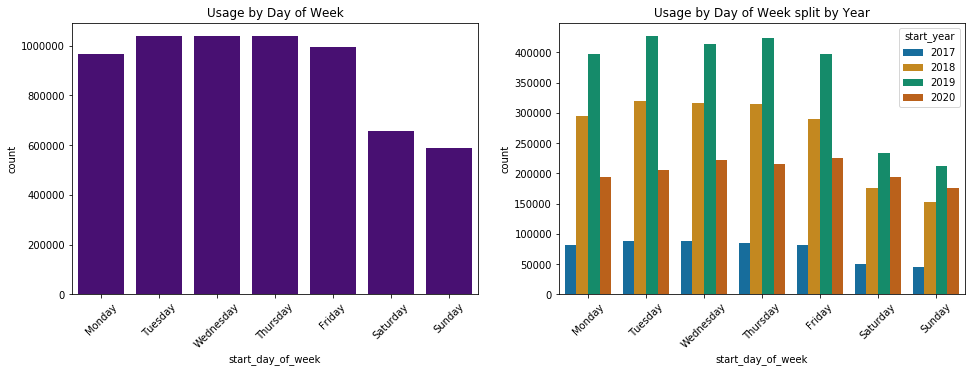

In [41]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sb.countplot(data = ford_df_cleaned, x = 'start_day_of_week', order = order_day, color = 'indigo');
plt.title('Usage by Day of Week')
plt.xticks(rotation = 45);

plt.subplot(1, 2, 2)
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sb.countplot(data = ford_df_cleaned, x = 'start_day_of_week', hue = 'start_year', order = order_day, palette = 'colorblind');
plt.title('Usage by Day of Week split by Year')
plt.xticks(rotation = 45);

**Observation**

- It's really interesting to see that the usage levels are highest during weekdays (Monday - Friday) and then drop down on the weekends, with Sunday being the lowest. This observation has stayed consistently true for each year of data that we have (2017 - 2020)

**2. FordGoByUsage by Month**

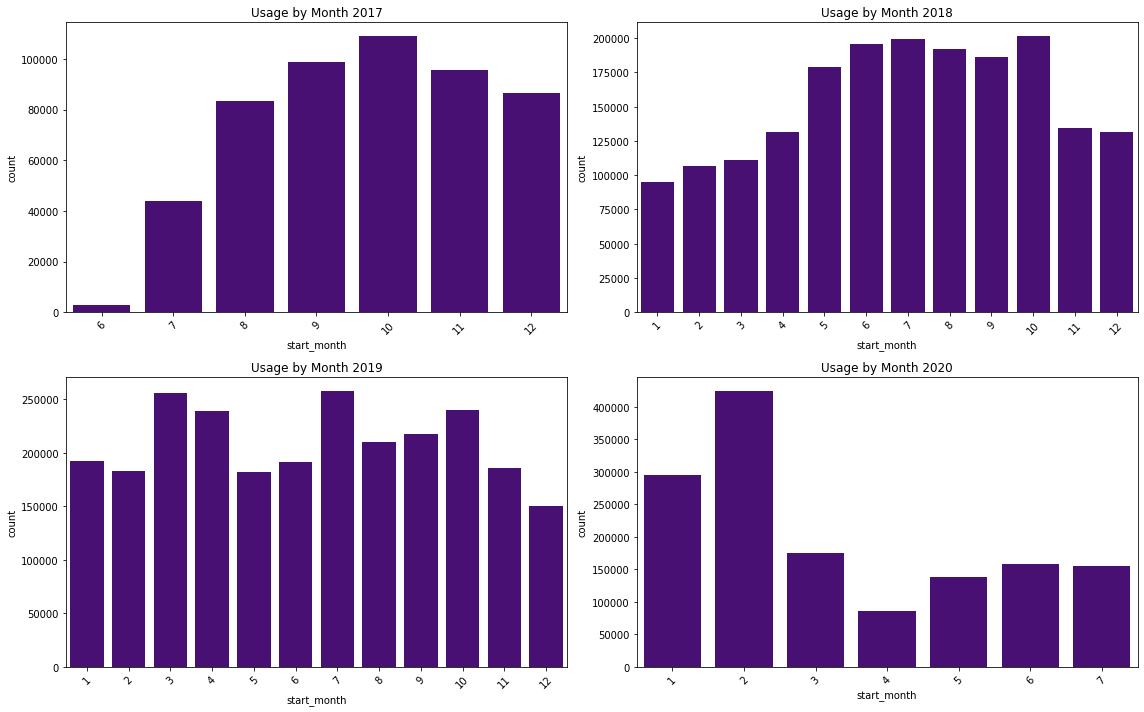

In [42]:
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_year == 2017], x = 'start_month', color = 'indigo');
plt.title('Usage by Month 2017')
plt.xticks(rotation = 45);

plt.subplot(2, 2, 2)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_year == 2018], x = 'start_month', color = 'indigo');
plt.title('Usage by Month 2018')
plt.xticks(rotation = 45);

plt.subplot(2, 2, 3)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_year == 2019], x = 'start_month', color = 'indigo');
plt.title('Usage by Month 2019')
plt.xticks(rotation = 45);

plt.subplot(2, 2, 4)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_year == 2020], x = 'start_month', color = 'indigo');
plt.title('Usage by Month 2020')
plt.xticks(rotation = 45);

plt.tight_layout()

**Observation**

- We have incomplete data for years 2017 and 2020
- From looking at the visualitions for 2018 and 2019, it appears that the warmer months from March - October are the months where demand is higher. For the colder months (November - February), demand is lower

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

**3. Are there certain periods of the day when we see more trips taking place i.e. Mornings vs evenings. Does the relationship between the numbers of trips taken by time of day differ for weekdays vs weekends?**

In [44]:
ford_df_cleaned.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min,distance_km,start_day_of_week
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,598.090,2.272570,Wednesday
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,943.479,1.889592,Wednesday
2,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18587.735,2.790681,Wednesday
3,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18558.829,2.790681,Wednesday
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,885.750,1.630598,Wednesday


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


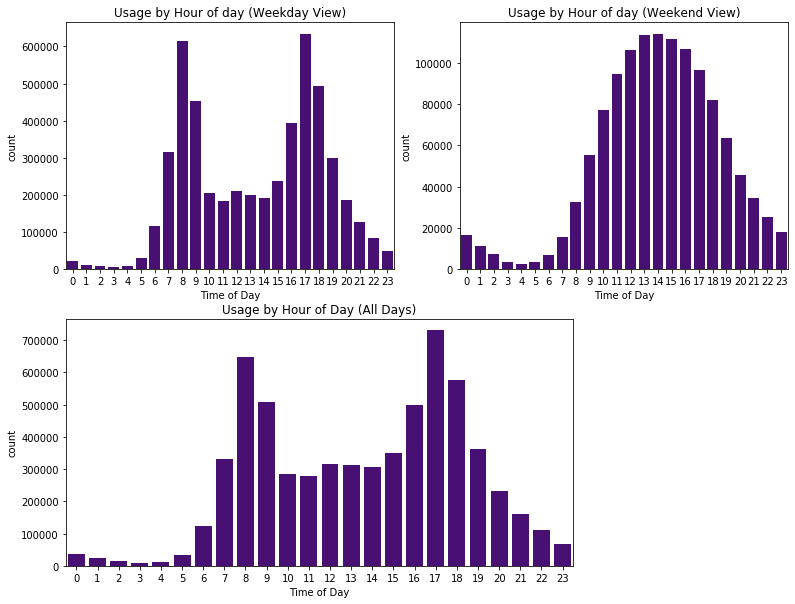

In [60]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])], x = 'start_hour', color = 'indigo')
plt.xlabel('Time of Day')
plt.title('Usage by Hour of day (Weekday View)')

plt.subplot(2, 3, 2)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Saturday', 'Sunday'])], x = 'start_hour', color = 'indigo')
plt.xlabel('Time of Day')
plt.title('Usage by Hour of day (Weekend View)')

plt.subplot(2, 2, 3)
chart = sb.countplot(data = ford_df_cleaned, x = 'start_hour', color = 'indigo');
plt.xlabel('Time of Day');
plt.title('Usage by Hour of Day (All Days)');

plt.tight_layout()

**Observation:**

 - It's really interesting to see that during the weekdays the hourly usage follows a bimodal distribution. With 8am and 5pm being the peak hours. This seems to suggest that people are more likely to hire a a vehicle during commutatble hours. With usage being low and flat during periods where the morjority of people who would otherwise hire are actually most likely in the office working.
 
- For weekends the hourly usage very much follows a unimodal distrubition with peak usage taking place from 12pm - 4pm. The usage figures demonstartes that people are most likely to be out and about in the City mid-day and at home during the evenings where usage figures start dropping off.


- These observations can help inform supply distribution

**4. Does the typical trip distance differ between weekends vs weekends?**

In [61]:
ford_df_cleaned.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_day,start_month,start_year,start_hour,duration_min,distance_km
count,5.558016e+06,6.323544e+06,6.323544e+06,5.547998e+06,6.322706e+06,6.322706e+06,5.787899e+06,6.323544e+06,6.323544e+06,6.323544e+06,6.323544e+06,6.323544e+06,6.322706e+06
mean,1.397651e+02,3.776032e+01,-1.223515e+02,1.365193e+02,3.775998e+01,-1.223493e+02,6.629560e+04,1.577384e+01,6.127813e+00,2.018768e+03,1.360627e+01,9.216251e+02,2.022033e+00
std,1.219162e+02,1.442049e-01,3.305438e-01,1.210843e+02,1.976004e-01,5.558997e-01,1.856019e+05,8.771348e+00,3.390047e+00,8.922244e-01,4.736492e+00,6.704722e+03,6.340157e+01
min,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00,1.000000e+00,1.000000e+00,2.017000e+03,0.000000e+00,-3.762000e+03,0.000000e+00
25%,4.200000e+01,3.776920e+01,-1.224159e+02,3.600000e+01,3.776922e+01,-1.224135e+02,1.637000e+03,8.000000e+00,3.000000e+00,2.018000e+03,9.000000e+00,3.642470e+02,8.893334e-01
50%,9.800000e+01,3.778015e+01,-1.223991e+02,9.500000e+01,3.778053e+01,-1.223989e+02,3.156000e+03,1.600000e+01,6.000000e+00,2.019000e+03,1.400000e+01,5.843380e+02,1.435902e+00
75%,2.230000e+02,3.779519e+01,-1.223881e+02,2.110000e+02,3.779539e+01,-1.223881e+02,9.587000e+03,2.300000e+01,9.000000e+00,2.019000e+03,1.700000e+01,9.260460e+02,2.249210e+00
max,5.340000e+02,4.551000e+01,0.000000e+00,5.340000e+02,4.551000e+01,0.000000e+00,9.999600e+05,3.100000e+01,1.200000e+01,2.020000e+03,2.300000e+01,3.283732e+06,1.279973e+04


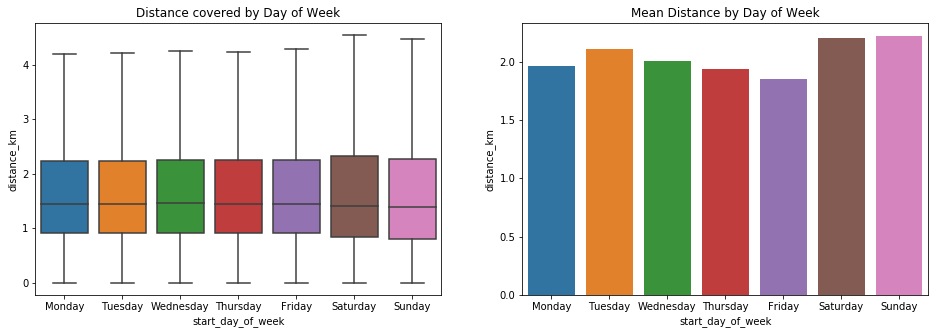

In [119]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sb.boxplot(data = ford_df_cleaned, x = 'start_day_of_week', y = 'distance_km', showfliers = False, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distance covered by Day of Week')

plt.subplot(1, 2, 2)
distance_mean = ford_df_cleaned.groupby('start_day_of_week').distance_km.mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
sb.barplot(data = distance_mean, x = 'start_day_of_week', y = 'distance_km')
plt.title('Mean Distance by Day of Week');

**Observation:**

- After having removed the outliers it seems that the median distance convered remains fairly consistent between weekdays and weekends. Weekends have a slightly larger interquartile range suggesting that there are more variable distances covered over the weekend vs weekends.
- The average of distances covered is larger on weekends than weekdays. We may want to see if there is a correllation between distance covered and average duration use.

**5. Does the duration usage differ between weekends vs weekends?**

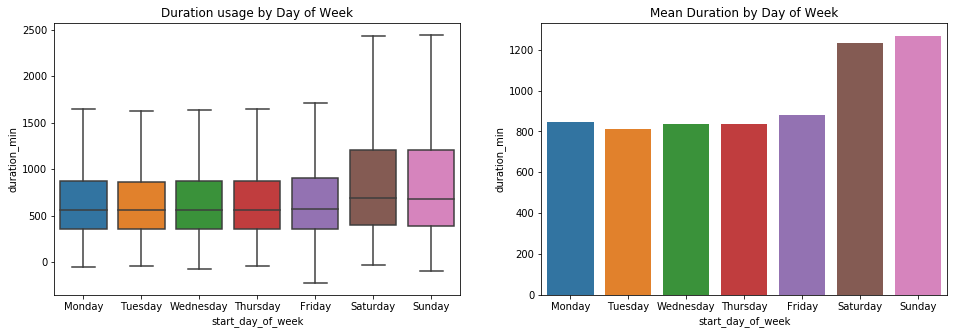

In [118]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sb.boxplot(data = ford_df_cleaned, x = 'start_day_of_week', y = 'duration_min', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], showfliers = False);
plt.title('Duration usage by Day of Week')

plt.subplot(1, 2, 2)
duration_mean = ford_df_cleaned.groupby('start_day_of_week').duration_min.mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
sb.barplot(data = duration_mean, x = 'start_day_of_week', y = 'duration_min');
plt.title('Mean Duration by Day of Week');

**Observation:**

 - Very interesting to see that the median duration and mean duration usage is much higher over the weekends vs weekdays.
 - There does seem to be a correlation between duration usage and distance covered which we'll cover during bivariate exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The observation which was most interesting was how the hourly usage followed a bimodal distribution during weekdays and unimodal during the weekends.
> Although the usage levels are lower on the weekends, people who are using them on the weekends are typically covering more distance and renting vehicles for longer.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Not much cleaning required, in order to conduct the relevant univariate explorations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**6. Do we see a correlation between duration usage and distance covered** 

(0, 2500)

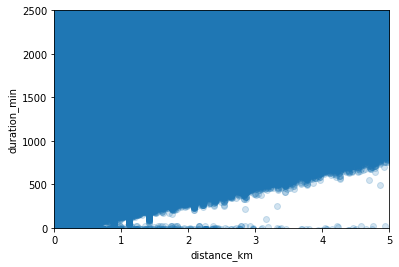

In [96]:
sb.regplot(data = ford_df_cleaned, x = 'distance_km', y = 'duration_min', scatter_kws = {'alpha': 0.2});
plt.xlim(0, 5)
plt.ylim(0, 2500)

**Observation:**

 - Lots of scatter points, but generally can see duration time trending upwards in line with distance covered.

**7. Do we see a difference in distance covered and time duration usage between Customers and Subscribers**

In [116]:
#Although we have more subscribers, we still have over 1 million customers, enabling us to observe key patterns and draw conclusions
ford_df_cleaned.user_type.value_counts()

Subscriber    4552602
Customer      1235297
Name: user_type, dtype: int64

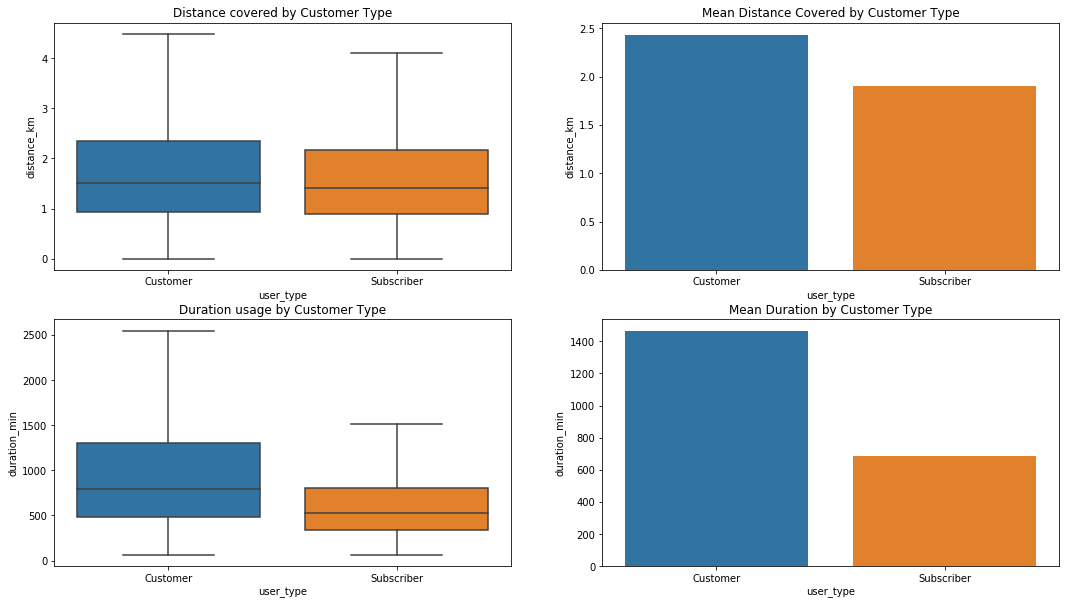

In [117]:
distance_mean_user = ford_df_cleaned.groupby('user_type').distance_km.mean().reset_index()
duration_mean_user = ford_df_cleaned.groupby('user_type').duration_min.mean().reset_index()

plt.figure(figsize = (18, 10));
plt.subplot(2, 2, 1);
sb.boxplot(data = ford_df_cleaned, x = 'user_type', y = 'distance_km', showfliers = False, order = ['Customer', 'Subscriber']);
plt.title('Distance covered by Customer Type')

plt.subplot(2, 2, 2)
sb.barplot(data = distance_mean_user, x = 'user_type', y = 'distance_km', order = ['Customer', 'Subscriber']);
plt.title('Mean Distance Covered by Customer Type');

plt.subplot(2, 2, 3)
sb.boxplot(data = ford_df_cleaned, x = 'user_type', y = 'duration_min', showfliers = False, order = ['Customer', 'Subscriber']);
plt.title('Duration usage by Customer Type')

plt.subplot(2, 2, 4)
sb.barplot(data = duration_mean_user, x = 'user_type', y = 'duration_min', order = ['Customer', 'Subscriber']);
plt.title('Mean Duration by Customer Type');

**Observation:**

 - It's really interesting to see that customers are more likely to cover greater distance based on higher median and means values in addition to the duration being longer. I wonder if we see different usage levels based on day of week.

**8. Do we see a different trend in terms of usage between customers and subscribers**

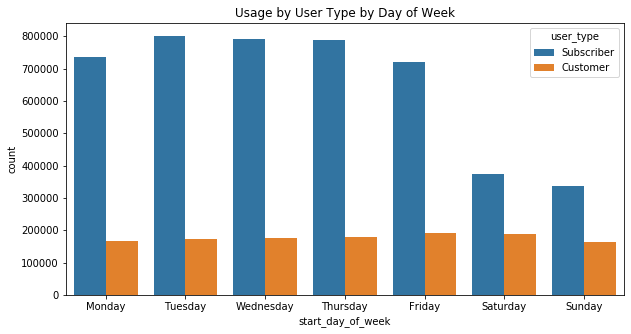

In [124]:
plt.figure(figsize = (10, 5));
sb.countplot(data = ford_df_cleaned, x = 'start_day_of_week', hue = 'user_type', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.title('Usage by User Type by Day of Week');

**Observation:**

 - Really interesting to see how usage levels are consistent for customers throughout the week, whilst for subscribers there is a big drop off in usage levels going into the weekend. This could be due to the vast number of subscribers renting for commutable purposes. Let's see if there is a difference in usage levels by hour of day (weekday vs weekend) between customers and subscribers.

**9. Do we see a difference in hour by day usage between customers and subscribers (weekdays vs weekends)**

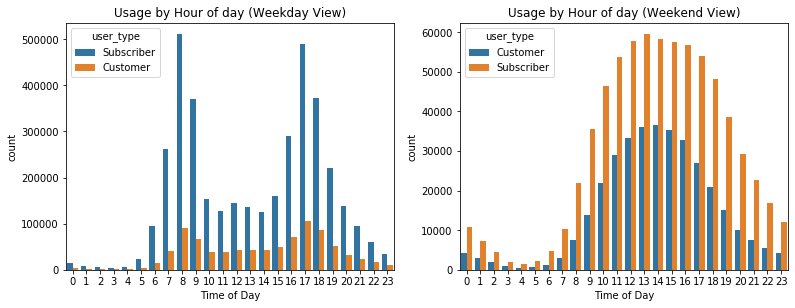

In [126]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])], x = 'start_hour', hue = 'user_type')
plt.xlabel('Time of Day')
plt.title('Usage by Hour of day (Weekday View)')

plt.subplot(2, 3, 2)
chart = sb.countplot(data = ford_df_cleaned[ford_df_cleaned.start_day_of_week.isin(['Saturday', 'Sunday'])], x = 'start_hour', hue = 'user_type')
plt.xlabel('Time of Day')
plt.title('Usage by Hour of day (Weekend View)');

**Observation:**

- The bimodal distribution looks weaker for customers vs subscribers during the weekdays. 
- Otherwise we see similar distribution of usage by hour between customers and subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was really interesting to see how the usage levels by day of week differed between customers and subscribers. Whilst for subscribers we see a big drop off in usage levels over the weekend, this is not the case for customers where usage levels are consistent irregardless of whether its a weekday or weekend. Had I not deepdived down to the user_type level then I would have concluded that usage levels drop off over the weekend irregardless of user type.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration usage and distance covered is typically higher for customers versus subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**10. It would be interesting to see a visual of most popular journeys (start_station_name -> end_station_name)**

In [127]:
ford_df_cleaned.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,member_casual,is_equity,start_day,start_month,start_year,start_hour,duration_min,distance_km,start_day_of_week
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,598.090,2.272570,Wednesday
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,943.479,1.889592,Wednesday
2,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18587.735,2.790681,Wednesday
3,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,NaN,28,2,2018,18,18558.829,2.790681,Wednesday
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,NaN,28,2,2018,23,885.750,1.630598,Wednesday


In [176]:
ford_df_cleaned.start_station_name.value_counts()

Market St at 10th St                                         104702
San Francisco Ferry Building (Harry Bridges Plaza)            99666
San Francisco Caltrain (Townsend St at 4th St)                97285
Berry St at 4th St                                            96955
San Francisco Caltrain Station 2  (Townsend St at 4th St)     86248
                                                              ...  
San Jose Depot                                                    4
Jerrold St at 3rd St                                              4
Prototype Lab                                                     4
Philly Demo                                                       2
SF Test Station                                                   1
Name: start_station_name, Length: 520, dtype: int64

In [180]:
journey_df = ford_df_cleaned.groupby(['start_station_name', 'end_station_name']).bike_id.count().reset_index()
journey_df.rename(columns = {'bike_id': 'count'}, inplace = True)
journey_df.sort_values(by = 'count', ascending = False, inplace = True)
journey_df
#There are 69K rows. Let's limit the rows to top 25 and build out a heatmap
journey_df_25 = journey_df.head(25)
journey_df_25

,start_station_name,end_station_name,count
56802,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,16313
17439,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,11621
62839,The Embarcadero at Sansome St,Steuart St at Market St,10460
33442,Grand Ave at Perkins St,19th Street BART Station,9164
62833,The Embarcadero at Sansome St,San Francisco Ferry Building (Harry Bridges Pl...,9021
4390,19th Street BART Station,Grand Ave at Perkins St,8812
56643,San Francisco Ferry Building (Harry Bridges Pl...,Berry St at 4th St,8120
60602,Steuart St at Market St,The Embarcadero at Sansome St,7406
42915,Market St at 10th St,Powell St BART Station (Market St at 4th St),6844
16550,Bay Pl at Vernon St,19th Street BART Station,6780


In [181]:
journey_df_25_pivot = journey_df_25.pivot(index = 'start_station_name', columns = 'end_station_name', values = 'count')

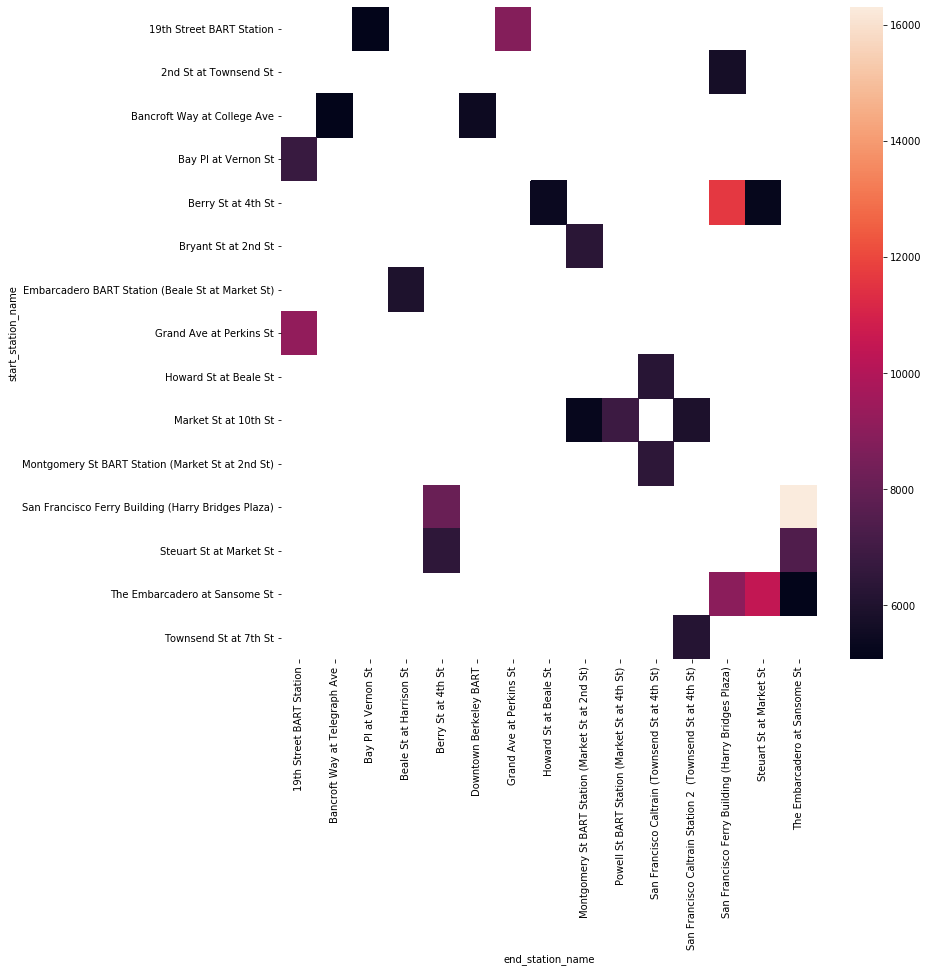

In [245]:
plt.figure(figsize = (12, 12))
sb.heatmap(journey_df_25_pivot)

**Observation:**

 - No insightful observations here with the exception that the Embarcadero at Sansome St seems to be a popular starting and ending journey point.

**11. It would be interesting to see a visual heatmap of hour by day usage against day of week (customer vs subscriber)**

Text(0.5, 1, 'Customer Heatmap')

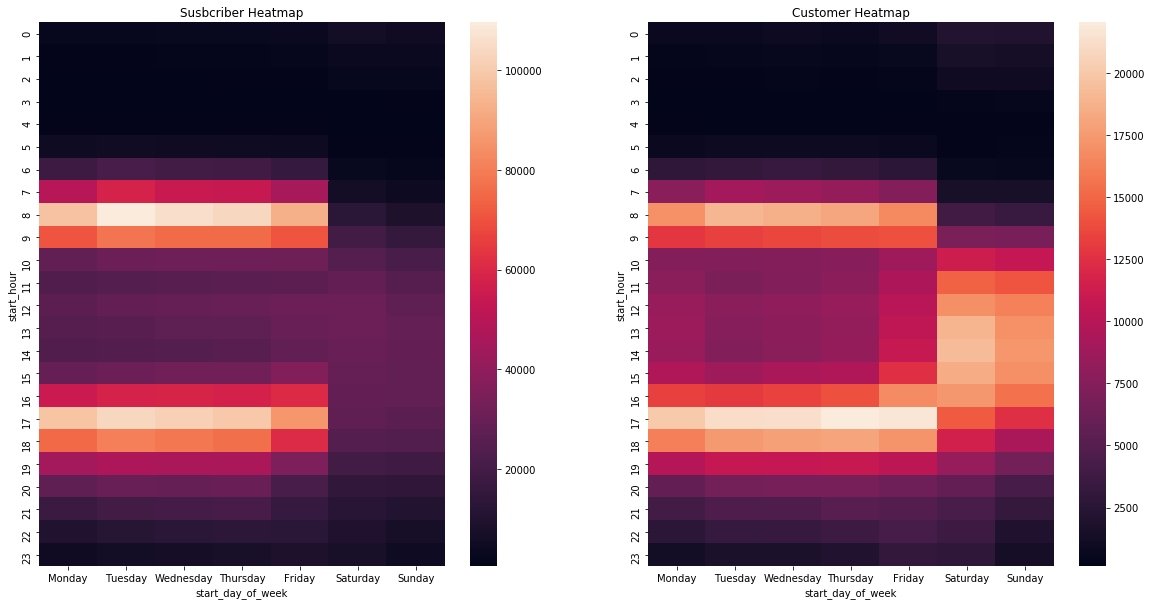

In [235]:
time_df = ford_df_cleaned[['start_hour', 'start_day_of_week', 'start_day', 'user_type']]
time_df_subscriber = time_df[time_df.user_type == 'Subscriber']
time_df_subscriber_group = time_df_subscriber.groupby(['start_hour', 'start_day_of_week']).start_day.count().reset_index()
time_df_subscriber_pivot = time_df_subscriber_group.pivot(index = 'start_hour', columns = 'start_day_of_week', values = 'start_day')
time_df_subscriber_pivot = time_df_subscriber_pivot.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

time_df_customer = time_df[time_df.user_type == 'Customer']
time_df_customer_group = time_df_customer.groupby(['start_hour', 'start_day_of_week']).start_day.count().reset_index()
time_df_customer_pivot = time_df_customer_group.pivot(index = 'start_hour', columns = 'start_day_of_week', values = 'start_day')
time_df_customer_pivot = time_df_customer_pivot.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
sb.heatmap(time_df_subscriber_pivot)
plt.title('Susbcriber Heatmap')

plt.subplot(1, 2, 2)
sb.heatmap(time_df_customer_pivot)
plt.title('Customer Heatmap')

**Observation:**

 - No additional insightful information to what we already know. 
 - Usage for customers follows a more stronger unimodal distribution over the weekends (usage peaking midday)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was nice to further deepdive into usage patterns by hour and by day of week and visualising this through a heatmap. Nothing really stood out to what we already didn't know. With usage following a bimodal distribution during the weekdays and a unimodal distribution during the weekends for both customers and subscribers

> It was also helpful to visualise the most popular journeys (starting station to end station). This could help us ensuring that we have adequate vehicles for these particular stations.

### Were there any interesting or surprising interactions between features?

> No standout insights with the exception of being able to visualise the most popular journeys (starting station -> ending station)

In [246]:
#Export Cleaned DataFrame to a CSV in order to produce Explanatory report
ford_df_cleaned.to_csv('ford_df_clean.csv', index = False)